Importing libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

Importing dataset 

In [2]:
df = pd.read_csv("vgsales.csv")
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [3]:
df.head(1)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


Cleaning Dataset

In [4]:
df.drop(columns=['Rank','Platform','Genre','Publisher'],axis =1)

,Name,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,2006.0,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,1985.0,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,2008.0,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,2009.0,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,1996.0,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,2002.0,0.01,0.00,0.00,0.00,0.01
16594,Men in Black II: Alien Escape,2003.0,0.01,0.00,0.00,0.00,0.01
16595,SCORE International Baja 1000: The Official Game,2008.0,0.00,0.00,0.00,0.00,0.01
16596,Know How 2,2010.0,0.00,0.01,0.00,0.00,0.01


In [5]:
df.head(1)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


In [6]:
df.drop_duplicates()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [7]:
df.isna()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
16593,False,False,False,False,False,False,False,False,False,False,False
16594,False,False,False,False,False,False,False,False,False,False,False
16595,False,False,False,False,False,False,False,False,False,False,False
16596,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [9]:
df = df.dropna()
df.count()

Rank            16291
Name            16291
Platform        16291
Year            16291
Genre           16291
Publisher       16291
NA_Sales        16291
EU_Sales        16291
JP_Sales        16291
Other_Sales     16291
Global_Sales    16291
dtype: int64

Checking Outliers

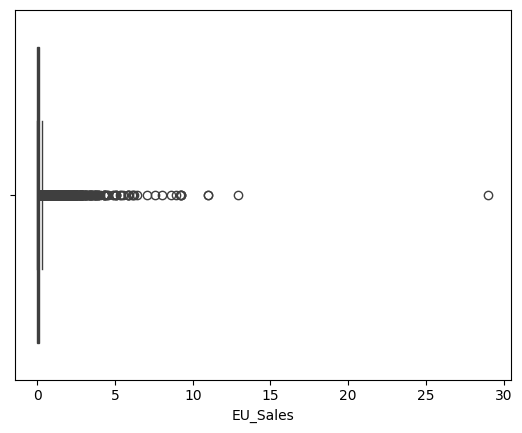

In [10]:
sns.boxplot(x='EU_Sales',data = df)
plt.show()

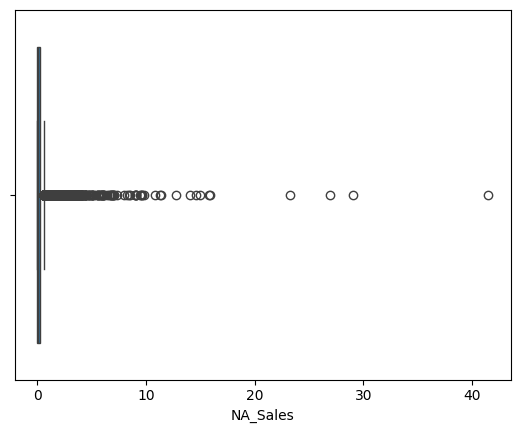

In [11]:
sns.boxplot(x='NA_Sales',data = df)
plt.show()

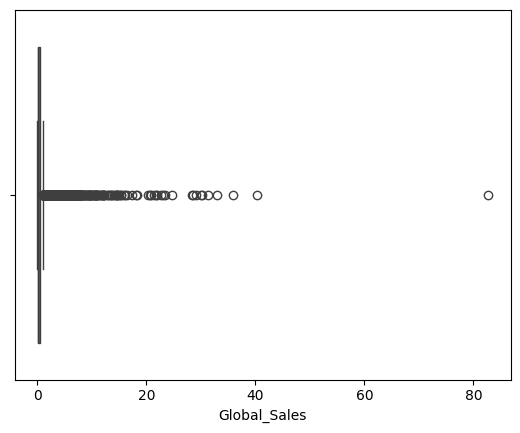

In [12]:
sns.boxplot(x='Global_Sales',data = df)
plt.show()

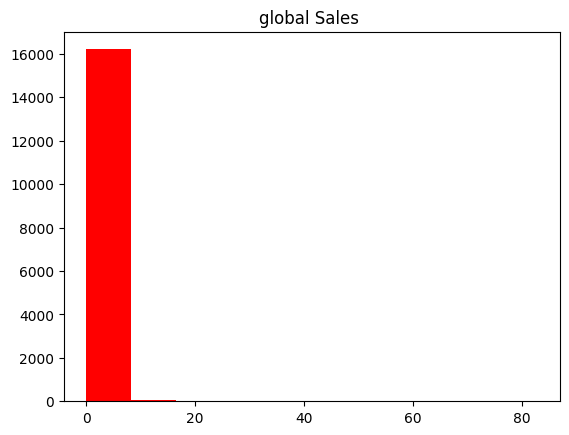

In [13]:
plt.hist(df['Global_Sales'],color='red')
plt.title("global Sales ")

plt.show()


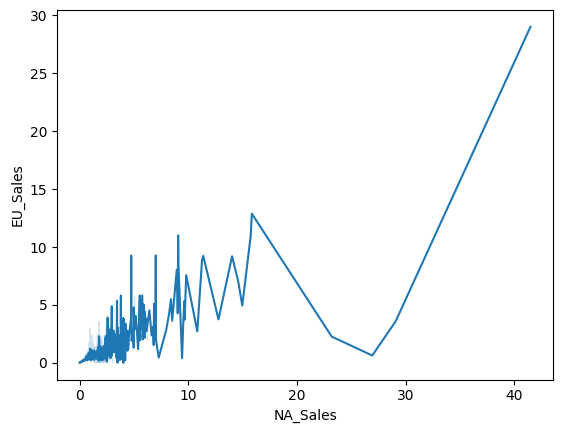

In [14]:
sns.lineplot(x='NA_Sales',y='EU_Sales',data = df)
plt.show()

Removing Outliers

In [15]:
Q1 = df.select_dtypes(include = np.number).quantile(0.25)
Q3 = df.select_dtypes(include = np.number).quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Rank            8307.00
Year               7.00
NA_Sales           0.24
EU_Sales           0.11
JP_Sales           0.04
Other_Sales        0.04
Global_Sales       0.42
dtype: float64


In [16]:
df = df[~((df.select_dtypes(include = np.number) < (Q1 - 1.5 * IQR)) | (df.select_dtypes(include = np.number) > (Q3 + 1.5 * IQR))).any(axis=1)]

In [17]:
Q1 = df.select_dtypes(include = np.number).quantile(0.25)
Q3 = df.select_dtypes(include = np.number).quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Rank            6649.00
Year               6.00
NA_Sales           0.14
EU_Sales           0.06
JP_Sales           0.01
Other_Sales        0.02
Global_Sales       0.19
dtype: float64


Correlation Matrix

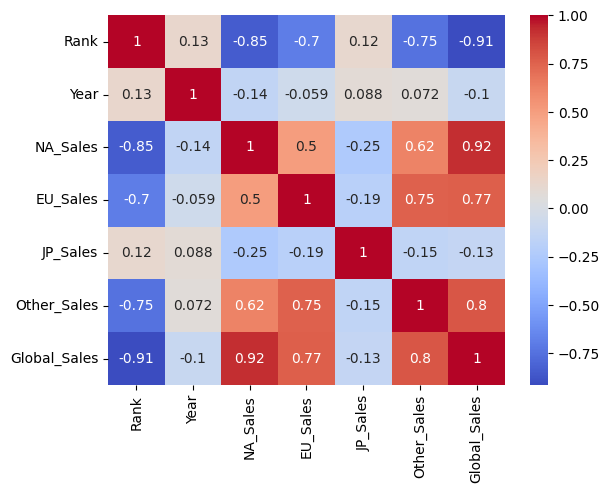

In [18]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

Import the required libraries for PCA(Principal Component Analysis)

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection  import train_test_split
from sklearn.linear_model  import LogisticRegression
from sklearn.metrics  import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

Preprocessing 

In [33]:
df_numeric = df.select_dtypes(np.number)

In [34]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)
print(X_scaled)


[[-2.05322646  0.38869675  3.43938323 ...  3.56206851  3.60140327
   4.63035898]
 [-2.04121942  0.18053957  4.0260043  ... -0.46986458  3.60140327
   4.51080249]
 [-2.03483269  0.18053957  4.0260043  ... -0.02187201  4.14073604
   4.45102424]
 ...
 [ 1.62297235  0.18053957 -0.83457032 ... -0.46986458 -0.71325893
  -0.92901796]
 [ 1.62322781  0.59685392 -0.83457032 ... -0.46986458 -0.71325893
  -0.92901796]
 [ 1.62348328 -0.86024629 -0.75076731 ... -0.46986458 -0.71325893
  -0.92901796]]


Apply pca (principal component analysis)

In [35]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[ 7.26527276,  3.11273059],
       [ 7.95413012,  0.79396999],
       [ 7.96086275,  1.11533953],
       ...,
       [-2.10588133, -0.28077459],
       [-2.06056092,  0.07218478],
       [-2.01144738, -1.13718589]], shape=(11675, 2))

Train , Test and Split 

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X_pca,y)
X_train

ValueError: not enough values to unpack (expected 4, got 2)

In [43]:
y_train

3944     0.51
3767     0.53
7313     0.21
13970    0.04
14791    0.03
         ... 
7871     0.19
5249     0.36
13862    0.04
4221     0.47
15265    0.02
Name: Global_Sales, Length: 9340, dtype: float64

In [44]:
X_test

array([[-1.62544738,  0.11141566],
       [-1.7544102 , -0.0757291 ],
       [ 6.02720521,  1.01686897],
       ...,
       [ 0.77463333, -0.77406684],
       [-0.12459831, -0.62970812],
       [-1.37672738,  0.23299318]], shape=(2335, 2))

In [39]:
y_test

14565    0.03
14929    0.02
2935     0.70
10326    0.11
9343     0.13
         ... 
13372    0.05
7191     0.22
6855     0.24
8883     0.15
14407    0.03
Name: Global_Sales, Length: 2335, dtype: float64

In [45]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9340, 2)
(2335, 2)
(9340,)
(2335,)
